In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('fer2013.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [4]:
df.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [31]:
df.shape

(35887, 3)

In [30]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [19]:
# convert string to integer
def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n

In [27]:
dictionary = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

In [33]:
X_train = np.zeros((28709,48,48),dtype=np.uint8)
X_test = np.zeros((7178,48,48),dtype=np.uint8)

Y_train = np.zeros(28709,dtype=np.uint8)
Y_test = np.zeros(7178,dtype=np.uint8)

In [34]:
count_test = 0
for i in range(len(df)):
    txt = df['pixels'][i]
    words = txt.split()

    if i < 28709:
        for j in range(2304):
            row = j // 48
            col = j % 48
            X_train[i][row][col] = atoi(words[j])

        Y_train[i] = df['emotion'][i]
        
    else:
        for j in range(2304):
            row = j // 48
            col = j % 48
            X_test[count_test][row][col] = atoi(words[j])

        Y_test[count_test] = df['emotion'][i]
        count_test += 1

In [39]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(dictionary[y[index]])

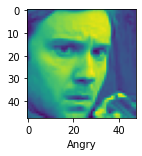

In [40]:
plot_sample(X_train, Y_train, 0)

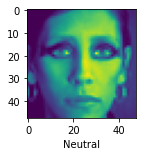

In [41]:
plot_sample(X_train, Y_train, 4)

In [42]:
X_train.shape

(28709, 48, 48)

In [43]:
X_test.shape

(7178, 48, 48)

In [44]:
X_train[0]

array([[ 70,  80,  82, ...,  52,  43,  41],
       [ 65,  61,  58, ...,  56,  52,  44],
       [ 50,  43,  54, ...,  49,  56,  47],
       ...,
       [ 91,  65,  42, ...,  72,  56,  43],
       [ 77,  82,  79, ..., 105,  70,  46],
       [ 77,  72,  84, ..., 106, 109,  82]], dtype=uint8)

In [46]:
#Normailizing our Data so that we get pixels between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [47]:
X_train[0]

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.20392157, 0.16862745,
        0.16078431],
       [0.25490196, 0.23921569, 0.22745098, ..., 0.21960784, 0.20392157,
        0.17254902],
       [0.19607843, 0.16862745, 0.21176471, ..., 0.19215686, 0.21960784,
        0.18431373],
       ...,
       [0.35686275, 0.25490196, 0.16470588, ..., 0.28235294, 0.21960784,
        0.16862745],
       [0.30196078, 0.32156863, 0.30980392, ..., 0.41176471, 0.2745098 ,
        0.18039216],
       [0.30196078, 0.28235294, 0.32941176, ..., 0.41568627, 0.42745098,
        0.32156863]])

In [48]:
X_train.shape

(28709, 48, 48)

In [53]:
myModel = models.Sequential([
    #Convolutional Layers
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)),
    layers.MaxPooling2D((2,2)),
    
    #Dense Neural Network
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')
])

In [54]:
myModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
history = myModel.fit(X_train, Y_train, epochs=20)

Epoch 1/20
898/898 [==============================] - 62s 68ms/step - loss: 1.6712 - accuracy: 0.3285
Epoch 2/20
898/898 [==============================] - 68s 75ms/step - loss: 1.3942 - accuracy: 0.4625
Epoch 3/20
898/898 [==============================] - 66s 73ms/step - loss: 1.2673 - accuracy: 0.5181
Epoch 4/20
898/898 [==============================] - 64s 72ms/step - loss: 1.1760 - accuracy: 0.5539
Epoch 5/20
898/898 [==============================] - 64s 72ms/step - loss: 1.1015 - accuracy: 0.5840
Epoch 6/20
898/898 [==============================] - 64s 72ms/step - loss: 1.0403 - accuracy: 0.6079
Epoch 7/20
898/898 [==============================] - 65s 72ms/step - loss: 0.9772 - accuracy: 0.6328
Epoch 8/20
898/898 [==============================] - 66s 74ms/step - loss: 0.9134 - accuracy: 0.6570
Epoch 9/20
898/898 [==============================] - 64s 71ms/step - loss: 0.8494 - accuracy: 0.6854
Epoch 10/20
898/898 [==============================] - 64s 71ms/step - loss: 0.784

In [69]:
evaluation01 = myModel.evaluate(X_test, Y_test)

225/225 [==============================] - 4s 18ms/step - loss: 2.4550 - accuracy: 0.5379


<function matplotlib.pyplot.show(close=None, block=None)>

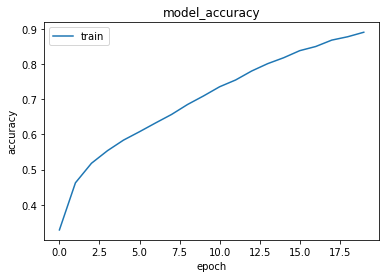

In [71]:
plt.plot(history.history['accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

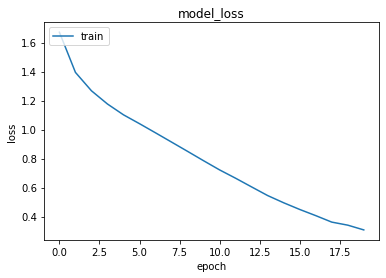

In [72]:
plt.plot(history.history['loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show

In [98]:
model_final = models.Sequential([
    #Convolutional Layers
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'), #filters 256 add 1 more conv2d filters 512
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    #Dense Neural Network
    layers.Flatten(),
    layers.Dense(2048, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(7, activation='softmax')
])

In [99]:
import keras

In [100]:
opt = keras.optimizers.Adam(learning_rate=0.0001,decay=1e-6)
model_final.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [101]:
model_final_details = model_final.fit(X_train, Y_train, epochs=50, validation_data=(X_test,Y_test))

Epoch 1/50
898/898 [==============================] - 294s 314ms/step - loss: 1.7467 - accuracy: 0.2915 - val_loss: 1.5555 - val_accuracy: 0.3993
Epoch 2/50
898/898 [==============================] - 288s 320ms/step - loss: 1.5099 - accuracy: 0.4156 - val_loss: 1.4145 - val_accuracy: 0.4586
Epoch 3/50
898/898 [==============================] - 291s 324ms/step - loss: 1.3850 - accuracy: 0.4678 - val_loss: 1.2990 - val_accuracy: 0.4976
Epoch 4/50
898/898 [==============================] - 285s 318ms/step - loss: 1.2849 - accuracy: 0.5147 - val_loss: 1.2229 - val_accuracy: 0.5311
Epoch 5/50
898/898 [==============================] - 286s 318ms/step - loss: 1.1976 - accuracy: 0.5487 - val_loss: 1.1822 - val_accuracy: 0.5421
Epoch 6/50
898/898 [==============================] - 285s 318ms/step - loss: 1.1256 - accuracy: 0.5785 - val_loss: 1.1364 - val_accuracy: 0.5656
Epoch 7/50
898/898 [==============================] - 287s 320ms/step - loss: 1.0513 - accuracy: 0.6095 - val_loss: 1.1045 -

In [103]:
train_loss = model_final_details.history['loss']
val_loss = model_final_details.history['val_loss']
train_acc = model_final_details.history['accuracy']
val_acc = model_final_details.history['val_accuracy']
xc=range(50)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


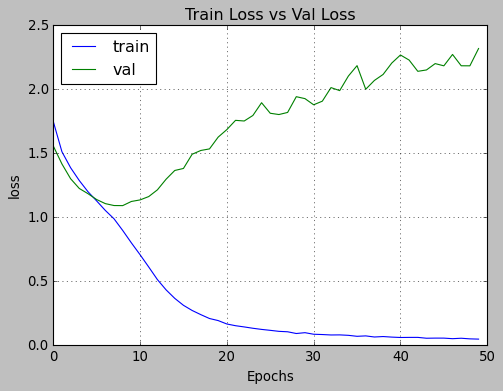

In [107]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Train Loss vs Val Loss')
plt.grid(True)
plt.legend(['train','val'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

In [109]:
plt.savefig('Train Loss VS Val Loss.png')

<Figure size 640x480 with 0 Axes>

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


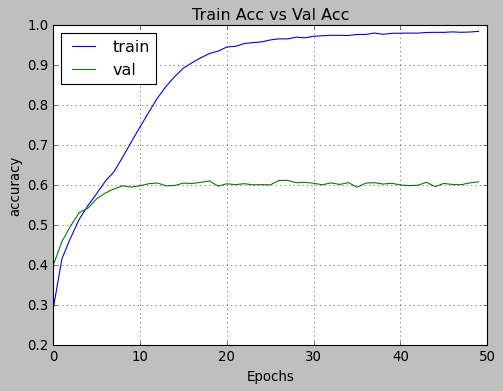

In [110]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Train Acc vs Val Acc')
plt.grid(True)
plt.legend(['train','val'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

In [111]:
plt.savefig('Train Acc vs Val Acc.png')

<Figure size 640x480 with 0 Axes>

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


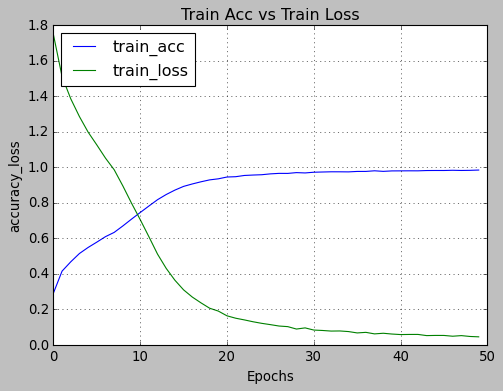

In [112]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,train_loss)
plt.xlabel('Epochs')
plt.ylabel('accuracy_loss')
plt.title('Train Acc vs Train Loss')
plt.grid(True)
plt.legend(['train_acc','train_loss'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

In [113]:
plt.savefig('Train Acc vs Train Loss.png')

<Figure size 640x480 with 0 Axes>

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


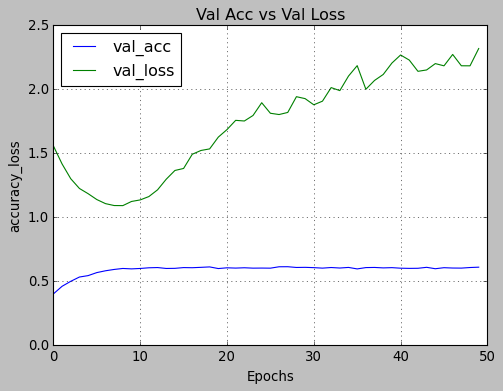

In [114]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,val_acc)
plt.plot(xc,val_loss)
plt.xlabel('Epochs')
plt.ylabel('accuracy_loss')
plt.title('Val Acc vs Val Loss')
plt.grid(True)
plt.legend(['val_acc','val_loss'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

In [115]:
plt.savefig('Val Acc VS Val Loss.png')

<Figure size 640x480 with 0 Axes>

In [116]:
from tensorflow.keras.models import load_model

In [117]:
model_final.save('model_final.h5')

In [120]:
model_hist_df = pd.DataFrame(model_final_details.history)
model_hist_df

,loss,accuracy,val_loss,val_accuracy
0,1.746748,0.291546,1.555466,0.399276
1,1.509929,0.415584,1.414513,0.458624
2,1.384972,0.467832,1.299013,0.497632
3,1.284872,0.514682,1.222877,0.531067
4,1.197579,0.548678,1.182228,0.542073
5,1.125631,0.578529,1.136378,0.565617
6,1.051269,0.609460,1.104531,0.579827
7,0.986080,0.633286,1.089560,0.590276
8,0.895091,0.669616,1.088903,0.597938
9,0.797999,0.707966,1.121368,0.594734


In [121]:
with open('model_history.csv', mode='w') as f:
    model_hist_df.to_csv(f)

In [128]:
model_final.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                 

In [132]:
from contextlib import redirect_stdout

with open('model_summary.txt', mode='w') as f:
    with redirect_stdout(f):
        model_final.summary()